<a href="https://colab.research.google.com/github/mamoon0806/robotic_systems/blob/main/HW5_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
import cv2
from google.colab.patches import cv2_imshow

def remove_obstacle_points_edges(image, points, edges):
    valid_points = []
    valid_edges = []

    for point in points:
        x, y = point
        if image[int(x), int(y)] == 0:  # Check if the point is within an obstacle
            continue
        valid_points.append(point)

    for edge in edges:
        point1 = edge[0]
        point2 = edge[1]
        if not is_edge_valid(image, point1, point2):
            continue
        valid_edges.append(edge)

    return np.array(valid_points), np.array(valid_edges)

def is_edge_valid(image, point1, point2):
    # Check if the line between point1 and point2 intersects with any obstacle
    x1, y1 = point1
    x2, y2 = point2
    num_points = 100
    xs = np.linspace(x1, x2, num_points)
    ys = np.linspace(y1, y2, num_points)

    for x, y in zip(xs, ys):
        if image[int(x), int(y)] == 0:  # Check if the point is within an obstacle
            return False

    return True

def convert_to_absolute_black_and_white(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Set a threshold value to create a binary image (absolute black and white)
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    return binary_img


def generate_probabilistic_roadmap(image, num_samples, neighbors_threshold):
    # Step 1: Sample random points from the image
    height, width = image.shape
    points = np.random.rand(num_samples, 2) * np.array([height, width])
    points = np.append(points, [[87, 28]], axis=0)
    points = np.append(points, [[228, 637]], axis=0)
    print(points)

    # Step 2: Build a KD-Tree for efficient nearest neighbor search
    tree = KDTree(points)

    # Step 3: Connect points within the specified threshold
    edges = []
    for i in range(points.shape[0]):
        point = points[i]
        distances, indices = tree.query([point], k=neighbors_threshold)
        for j in range(neighbors_threshold):
          edges.append((points[i], points[indices[0][j]]))

    filtered_points, filtered_edges = remove_obstacle_points_edges(image, points, edges)

    # Step 4: Visualize the roadmap
    visualize_roadmap(image, filtered_points, filtered_edges)

def visualize_roadmap(image, points, edges):
    plt.imshow(image, cmap='gray')
    plt.scatter(points[:, 1], points[:, 0], c='red', marker='o')

    for edge in edges:
        point1 = edge[0]
        point2 = edge[1]
        plt.plot([point1[1], point2[1]], [point1[0], point2[0]], 'b-', alpha=0.3)

    plt.title('Probabilistic Roadmap')
    plt.legend()
    plt.show()

[[ 40.26476688 662.08257607]
 [240.67475247 578.8393139 ]
 [129.27288783 564.48581613]
 [ 59.24288562 330.94210487]
 [233.31441275 111.77762366]
 [ 87.          28.        ]
 [228.         637.        ]]


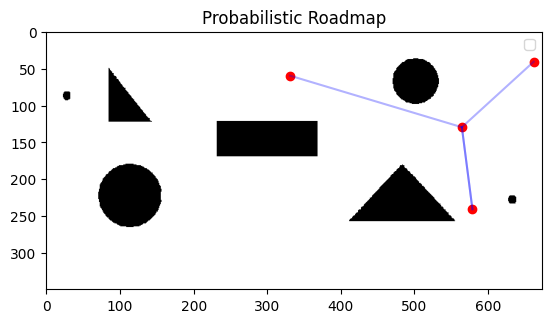

In [ ]:
bw_image = convert_to_absolute_black_and_white('Capture.PNG')
num_samples = 5
neighbors_threshold = 3
generate_probabilistic_roadmap(bw_image, num_samples, neighbors_threshold)